In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Task 1: Merge 12 months of sales into a single file

In [3]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_list = []

for m in months:
    sales_list.append(pd.read_csv('Sales_' + m + '_2019.csv'))

sales = pd.concat(sales_list, keys=months)
sales.head()

Order ID                   Product Quantity Ordered Price Each  \
January 0   141234                    iPhone                1        700   
        1   141235  Lightning Charging Cable                1      14.95   
        2   141236          Wired Headphones                2      11.99   
        3   141237          27in FHD Monitor                1     149.99   
        4   141238          Wired Headphones                1      11.99   

               Order Date                       Purchase Address  
January 0  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
        1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
        2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
        3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
        4  01/25/19 11:59          387 10th St, Austin, TX 73301

## Data Augmentation

#### Task 2: Add a Month column

In [4]:
if not 'Month' in sales.columns:
    sales.insert(4, 'Month', 0)

for m,i in zip(months, range(1,13)):
    sales.loc[m, 'Month'] = i

sales

Order ID                     Product Quantity Ordered  \
January  0       141234                      iPhone                1   
         1       141235    Lightning Charging Cable                1   
         2       141236            Wired Headphones                2   
         3       141237            27in FHD Monitor                1   
         4       141238            Wired Headphones                1   
...                 ...                         ...              ...   
December 25112   319666    Lightning Charging Cable                1   
         25113   319667       AA Batteries (4-pack)                2   
         25114   319668             Vareebadd Phone                1   
         25115   319669            Wired Headphones                1   
         25116   319670  Bose SoundSport Headphones                1   

               Price Each  Month      Order Date  \
January  0            700      1  01/22/19 21:25   
         1          14.95      1  01/28/19 14:15   
         2          11.99      1  01/17/19 13:33   
         3         149.99      1  01/05/19 20:33   
         4          11.99      1  01/25/19 11:59   
...                   ...    ...             ...   
December 25112      14.95     12  12/11/19 20:58   
         25113       3.84     12  12/01/19 12:01   
         25114        400     12  12/09/19 06:43   
         25115      11.99     12  12/03/19 10:39   
         25116      99.99     12  12/21/19 21:45   

                                      Purchase Address  
January  0             944 Walnut St, Boston, MA 02215  
         1            185 Maple St, Portland, OR 97035  
         2       538 Adams St, San Francisco, CA 94016  
         3          738 10th St, Los Angeles, CA 90001  
         4               387 10th St, Austin, TX 73301  
...                                                ...  
December 25112  14 Madison St, San Francisco, CA 94016  
         25113    549 Willow St, Los Angeles, CA 90001  
         25114        273 Wilson St, Seattle, WA 98101  
         25115          778 River St, Dallas, TX 75001  
         25116  747 Chestnut St, Los Angeles, CA 90001  

[186850 rows x 7 columns]

## Data Cleaning

#### Task 3: Find NaN rows

In [5]:
#sales_null = sales[sales.isnull().any(axis=1)]

sales = sales.dropna()
sales.loc['April'].head()

,Order ID,Product,Quantity Ordered,Price Each,Month,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,4,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Task 4: Convert values of 'Price Each' and 'Quantity Ordered' to numerical

In [6]:
#sales_invalid_price = sales['Price Each'].apply(lambda x: not isinstance(x,(int,float)))
#sales_invalid_price.head()

sales = sales.loc[sales['Price Each'] != 'Price Each'] # clean up
sales['Price Each'] = sales['Price Each'].astype(float) # could have used pd.to_numeric(sales['Price Each'])
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype(int)
sales.head()

Order ID                   Product  Quantity Ordered  Price Each  \
January 0   141234                    iPhone                 1      700.00   
        1   141235  Lightning Charging Cable                 1       14.95   
        2   141236          Wired Headphones                 2       11.99   
        3   141237          27in FHD Monitor                 1      149.99   
        4   141238          Wired Headphones                 1       11.99   

           Month      Order Date                       Purchase Address  
January 0      1  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
        1      1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
        2      1  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
        3      1  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
        4      1  01/25/19 11:59          387 10th St, Austin, TX 73301

#### Task 5: Add a 'Order Total' column

In [7]:
if not 'Order Total' in sales.columns:
    sales.insert(4, 'Order Total', 0)

sales['Order Total'] = sales['Quantity Ordered'] * sales['Price Each']
sales.head()

Order ID                   Product  Quantity Ordered  Price Each  \
January 0   141234                    iPhone                 1      700.00   
        1   141235  Lightning Charging Cable                 1       14.95   
        2   141236          Wired Headphones                 2       11.99   
        3   141237          27in FHD Monitor                 1      149.99   
        4   141238          Wired Headphones                 1       11.99   

           Order Total  Month      Order Date  \
January 0       700.00      1  01/22/19 21:25   
        1        14.95      1  01/28/19 14:15   
        2        23.98      1  01/17/19 13:33   
        3       149.99      1  01/05/19 20:33   
        4        11.99      1  01/25/19 11:59   

                                Purchase Address  
January 0        944 Walnut St, Boston, MA 02215  
        1       185 Maple St, Portland, OR 97035  
        2  538 Adams St, San Francisco, CA 94016  
        3     738 10th St, Los Angeles, CA 90001  
        4          387 10th St, Austin, TX 73301

### Question 1: What was the best month for sales? How much was earned that month?

In [13]:
month_sales = sales.groupby('Month').sum()
month_sales = month_sales.drop(['Quantity Ordered', 'Price Each'], axis=1)
month_sales['Total Rounded'] = round(month_sales['Order Total']/1000000, 2)
month_sales['$ (millions)'] = '$ ' + (month_sales['Order Total']/1000000).round(2).astype(str) + ' M'

month_sales.head(12)

,Order Total,Total Rounded,$ (millions)
Month,,,
1,1.815335e+06,1.82,$ 1.82 M
2,2.203481e+06,2.20,$ 2.2 M
3,2.809063e+06,2.81,$ 2.81 M
4,3.396059e+06,3.40,$ 3.4 M
5,3.144585e+06,3.14,$ 3.14 M
6,2.578293e+06,2.58,$ 2.58 M
7,2.646900e+06,2.65,$ 2.65 M
8,2.244412e+06,2.24,$ 2.24 M
9,2.098817e+06,2.10,$ 2.1 M


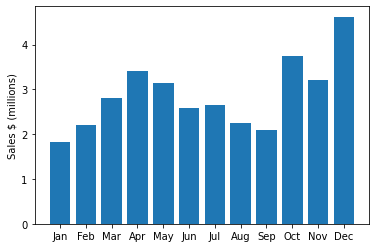

In [27]:
plt.bar([s[:3] for s in months], month_sales['Total Rounded'])
plt.ylabel('Sales $ (millions)')
plt.show()

#### Task 6: Add a 'City' column

### Question 2: What city had the highest number of sales?